## Solving Utility Maximization Problem with Quantum Reinforcement Learning

In general markets, the competitive equilibrium, or more generally, Dynamic Stochastic General Equilibrium (DSGE) is characterized by a set of state variables and the consumption and production plans of each agent to maximize the utility. Such utility maximization problem has been traditionally dealt with Lagrangian methods. In this Hackathon project, we demonstrate **a quantum approach to solving utility maximization problem.**

### References

[1] Hill, Edward, Marco Bardoscia, and Arthur Turrell. "Solving heterogeneous general equilibrium economic models with deep reinforcement learning." arXiv preprint [arXiv:2103.16977 (2021)](https://arxiv.org/pdf/2103.16977.pdf).

[2] Wu, Shaojun, et al. "Quantum reinforcement learning in continuous action space." arXiv preprint [arXiv:2012.10711 (2020)](https://arxiv.org/pdf/2012.10711.pdf).

[3] https://github.com/LauraGentini/QRL (Qiskit Hackathon Europe on Quantum Reinforcement Learning)


### Model

We first constructed a simplified model of DSGE problem based on the recent work done by researchers at University of College, London [1]. In our model, we assume a single, rational household agent, and a single firm existing in the market. The agent is employed by the firm, and the utility per period is given by $u_t=\textrm{ln}(c_{t})-\frac{\theta}{2}n_t^2$, with the action variables $c_{t}$, representing consumption, and $n_t$, the number of hours worked. We use a discrete timestep over $0\leq t<T$. The price is fixed for $p_{t}=1$ for all times, with no interest rate. The wage is given by $w=1$ for $t<T/2$ and $w=0.5$ afterwards. The agent is also subject to a budget constraint $b_{t+1}=b_t+w_tn_t-p_tc_t$, with the no Ponzi condition $b_T=0$ to preempt unlimited borrowing by the agent. The agent wants to maximize the dicsounted utility $\sum_t \beta^t u_t$ with $\beta=0.97$ and $T=20$. To summarize:

* A single agent and a single firm
* Maximize $\sum_{t=0}^{T} \beta^t u_t$, where $u_t=\textrm{ln}(c_{t})-\frac{\theta}{2}n_t^2$, $\beta=0.97$ and $T=20$
* Budget Constraints $b_{t+1}=b_t+w_tn_t-p_tc_t$; $b_T=0$, where $p_{t}=1$, $w=1$ or $0.5$

There have been some attempts to solve this type of problem using classical machine learning or numerical analysis, but Quantum approach to such problems is absent. We applied Quantum Reinforcement Learning technique to solve the problem. Before we explain our solution, we first present some preliminaries on Reinforcement Learning necessary to understand our approach.


### Reinforcement Learning

In Reinforcement Learning problems, there are states, and actions that the agent perform at each time step. The agent is given some rewards upon performing each action. Our goal is to find a set of states and actions that maximize the total rewards over the entire period. To be more mathematically precise, we have to introduce the concept of [Markov Decision Process](https://en.wikipedia.org/wiki/Markov_decision_process) (MDP). A MDP problem is completely characterized by $(S,A,R,P,\gamma)$, where $S$ is the state space, $A$ is the action space, $R$ represents a reward as a function of the current state and the chosen action, $P$ represents a transition probability given (state, action), and $\gamma$ is the discount factor. The objective function we want to maximize is the value function, the expectation value of total rewards over all times, which is given as follows:
$$V(s)=E\biggl[\sum_{t\geq 0}\gamma^t r_t|s_0=s\biggr].$$

While the value function is a measure of how preferrable each state is, it's actually more important to identify how preferaable each (state, action) pair is. The measure of such preferrability of (state,action) pair is given by the Q-value function, which is defined as
$$Q(s)=E\biggl[\sum_{t\geq 0}\gamma^t r_t|s_0=s, a_0=a\biggr].$$

Machine Learning technique that attempts to systematically learn this Q-value function is known as Q-learning. Q-learning is also a method that we utilized in this hackathon project to solve our problem.

### Quantum Reinforcement Learning

<div style="max-width:500px; margin: 0 auto;">
    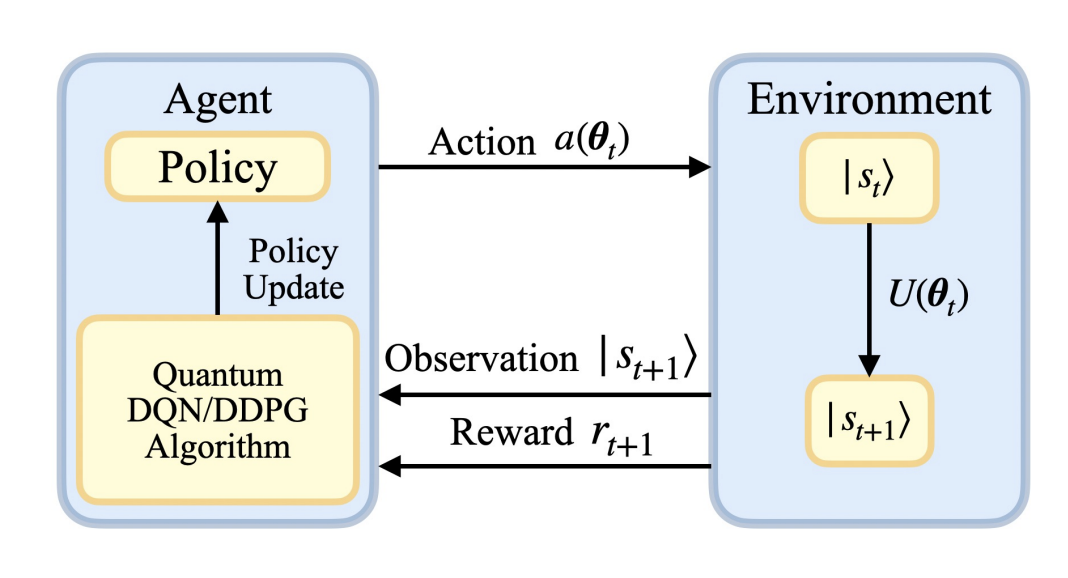
</div>
<center>Figure1. Quantum Reinforcement Learning Model [1]</center>

Quantum Reinforcement Learning model is virtually same as its classical counterpart, except for the fact that states are now represented and quantum states. As described in Figure1, there is an agent interacting with the environment, which is characterized by its state. The agent's action influences the environment, and this action is determined by the *policy*, which is chosen to maximize the expected reward over all times. The Quantum Circuit implementing this framework is shown below.

<div style="max-width:500px; margin: 0 auto;">
    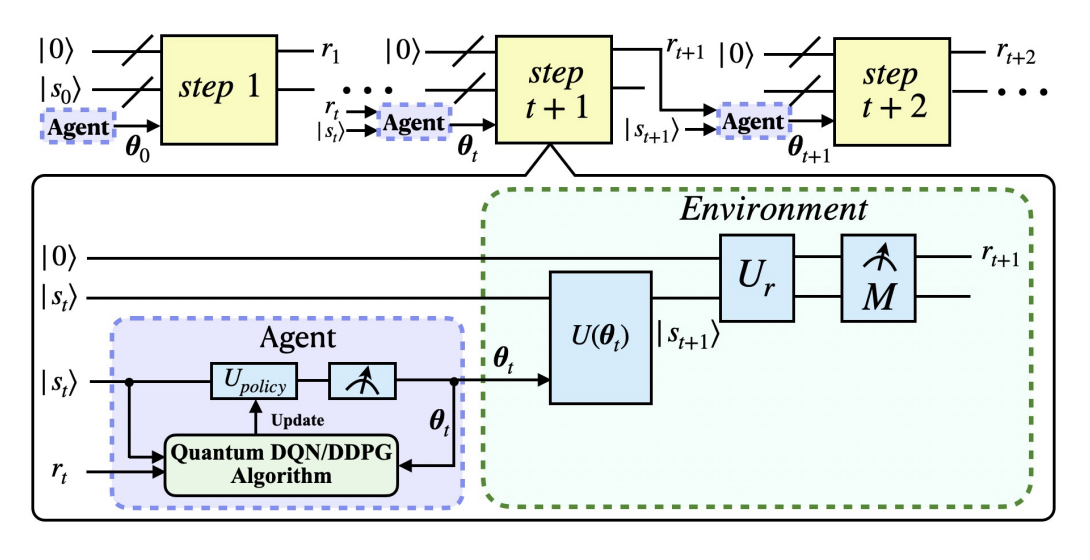
</div>
<center>Figure2. Quantum Circuit for QRL model [1]</center>

In the above, the reward is calculated through a proper choice of $U_r$ and the measurement operator $M$, and the transition of states over time is given by $\theta_t$, where $\theta_t$ represents the agent's action. $\theta_t$ is trained by a separate Quantum DDPG (Deep Deterministic Policy Gradient) algoritm. After enough amount of training on the policy determining the agent's action $\theta_t$ given $s_t$, we're then equipped with the Quantum Neural Network to easily *tell* someone the best action to maximize their lifetime *reward* or *utility*. Pseudocode of Quantum DDPG algorithm is shown below [1]. Essentially, it's about training the Q-value function $Q_\omega(s,\theta)$ and the policy function $\pi_\eta(s)$.

<div style="max-width:500px; margin: 0 auto;">
    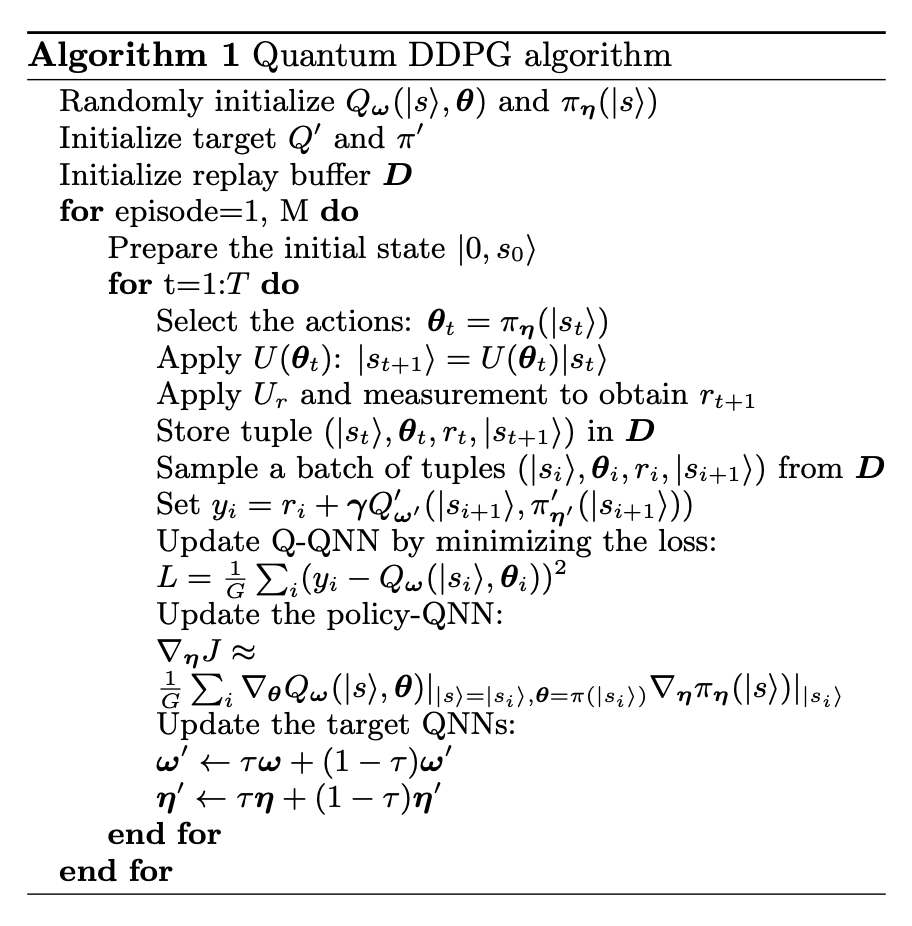
</div>
<center>Figure3. Quantum DDPG algorithm [1]</center>

### Our solution

As we're solving Quantum Reinforcement Learning problem, it's essential to define (1) rewards, (2) actions, and (3) states. Reward is straightforwardly given by the utility function. Actions, as specified in the problem statement, consist of consumption and the number of hours worked. We're now left with properly defining the states, and encoding these states into our Quantum Circuit. We first note that the agent's state is completely characterized by specifying $b_t$ and $c_t$ at all times, since $n_t$ could be calculated from the budget constraints. We now encode our state as $$ \left| \psi \right\rangle = \textrm{cos}\frac{\theta}{2}\left| 0 \right\rangle+e^{i\phi}\textrm{sin}\frac{\theta}{2}\left| 1 \right\rangle,$$ where $b_t=\textrm{tan}\theta$ and $c_t=\textrm{tan}{(\phi/4)}$, with $-\pi/2<\theta<\pi/2$ and $0\leq\phi\leq2\pi$. Through this encoding, we can encode the entirety of our state with a single qubit. Note that the reward is computed as the utility function without resorting to $U_r$ and $M$, and is assumed to be negative infinity for states that do NOT satisfy the budget constraint or $n_t\geq0$. Encoding the state with such Bloch angles also makes the transition of states, $U(\theta_t)$, easy to implement, as this transition can be implemented only with the rotations around $x,y,$ and $z$ axes on the Bloch sphere. With this Quantum Reinforcement Learning architecture and the encoding of states, we employed to Quantum DDPG algorithm to learn the Q-value function and the policy. In the final and last section of this notebook, we present our concrete implementation of Quantum Reinforcement Learning for solving our macroeconomic model.

## Codes with Comments

### Import relevant packages

In [1]:
# General imports
import numpy as np
import matplotlib.pyplot as plt

# Qiskit Circuit imports
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter, ParameterVector, ParameterExpression
from qiskit.circuit.library import TwoLocal

# Qiskit imports
import qiskit as qk
from qiskit.utils import QuantumInstance
from qiskit import Aer
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.providers.aer.noise import NoiseModel, amplitude_damping_error


# Qiskit Machine Learning imports
import qiskit_machine_learning as qkml
from qiskit_machine_learning.neural_networks import CircuitQNN
from qiskit_machine_learning.connectors import TorchConnector

# PyTorch imports
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F


from math import pi
from math import *

### Define sub-circuits for encoding states and training the policy

In [2]:
def encoding_circuit(inputs, num_qubits = 1, *args):
    """
    Encode classical input data (i.e. the state of the enironment) on a quantum circuit. 
    To be used inside the `parametrized_circuit` function. 
    
    Args
    -------
    inputs (list): a list containing the classical inputs.
    num_qubits (int): number of qubits in the quantum circuit.
    
    Return
    -------
    qc (QuantumCircuit): quantum circuit with encoding gates.
    
    """
    
    qc = qk.QuantumCircuit(num_qubits)
    
    # Encode data with a RX rotation
    for i in range(num_qubits): 
        qc.u(inputs[i*2],inputs[i*2+1],0,i)
        
    return qc

def action_circuit(num_qubits = 1,*args):
    ac = qk.QuantumRegister(num_qubits)
    qc = qk.QuantumCircuit(ac)
    input = qk.circuit.ParameterVector('x', 4*num_qubits)
    for i in range(num_qubits): 
        qc.rx(input[4*i], i)
        qc.rz(input[4*i+1], i)
        qc.u(input[4*i+2],input[4*i+3],0,i)
    return qc

In [3]:
def parametrized_circuit(num_qubits = 1, reps = 1, insert_barriers = True, ):
    """
    Create the Parameterized Quantum Circuit (PQC) for estimating Q-values.
    It implements the architecure proposed in Skolik et al. arXiv:2104.15084.
    
    Args
    -------
    num_qubit (int): number of qubits in the quantum circuit. 

    reps (int): number of repetitions (layers) in the variational circuit. 
    insert_barrirerd (bool): True to add barriers in between gates, for better drawing of the circuit. 

    
    Return
    -------
    qc (QuantumCircuit): the full parametrized quantum circuit. 
    """
    
    qr = qk.QuantumRegister(num_qubits)
    qc = qk.QuantumCircuit(qr)
          
    # Define a vector containg Inputs as parameters (*not* to be optimized)
    inputs = qk.circuit.ParameterVector('x', 2*num_qubits)
            
    # Define a vector containng variational parameters
    θ = qk.circuit.ParameterVector('θ', 3 * num_qubits * reps)
    qc.compose(encoding_circuit(inputs, num_qubits = num_qubits), inplace = True)
    if insert_barriers: qc.barrier()
    
    # Iterate for a number of repetitions
    for rep in range(reps):

        # Encode classical input data

            
        # Variational circuit (does the same as TwoLocal from Qiskit)
        for qubit in range(num_qubits):
            qc.rx(θ[qubit + 3*num_qubits*(rep)], qubit)
            qc.rz(θ[qubit + 3*num_qubits*(rep) + num_qubits], qubit)
            qc.rx(θ[qubit + 3*num_qubits*(rep) + 2*num_qubits], qubit)
        if insert_barriers: qc.barrier()
            
        # Add entanglers (this code is for a circular entangler)
        if num_qubits>2:
            qc.cnot(qr[-1], qr[0])
            for qubit in range(num_qubits-1):
                qc.cnot(qr[qubit], qr[qubit+1])
            if insert_barriers: qc.barrier()
        elif num_qubits==2:
            qc.cnot(qr[-1], qr[0])
        
    return qc

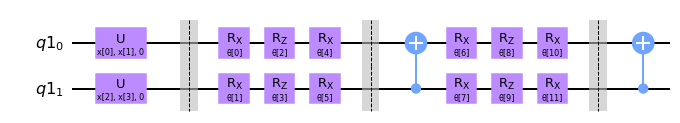

In [4]:
# Select the number of qubits
num_qubits = 1

# Generate the Parametrized Quantum Circuit (note the flags reuploading and reps)
policy_qc = parametrized_circuit(num_qubits = num_qubits, 
                          reps = 2)

value_qc=parametrized_circuit(num_qubits = 2*num_qubits, 
                          reps = 2)

# Fetch the parameters from the circuit and divide them in Inputs (X) and Trainable Parameters (params)
# The first four parameters are for the inputs 
policy_X = list(policy_qc.parameters)[: 2*num_qubits]
value_X=list(value_qc.parameters)[: 4*num_qubits]

# The remaining ones are the trainable weights of the quantum neural network
policy_params = list(policy_qc.parameters)[num_qubits:]
value_params=list(value_qc.parameters)[2*num_qubits:]

policy_qc.draw('mpl')
value_qc.draw('mpl')

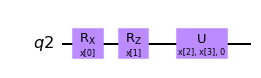

In [5]:
action_qc=action_circuit(num_qubits=num_qubits)
action_X=list(action_qc.parameters)
action_qc.draw('mpl')

In [6]:
# Select a quantum backend to run the simulation of the quantum circuit
qi = QuantumInstance(qk.BasicAer.get_backend('statevector_simulator'))

# Create a Quantum Neural Network object starting from the quantum circuit defined above
policy_qnn = CircuitQNN(policy_qc, input_params=policy_X, weight_params=policy_params, 
                 quantum_instance = qi)

value_qnn = CircuitQNN(value_qc, input_params=value_X, weight_params=value_params, 
                 quantum_instance = qi)

action_qnn= CircuitQNN(action_qc, input_params=action_X,quantum_instance = qi)


policy_initial = 0.1*(2*torch.rand(policy_qnn.num_weights) - 1)
policy_nn = TorchConnector(policy_qnn, policy_initial)

value_initial = 0.1*(2*torch.rand(value_qnn.num_weights) - 1)
value_nn = TorchConnector(value_qnn, value_initial)

action_nn=TorchConnector(action_qnn)

### Implement the replay-memory technique

In [7]:
class Replay_buffer():
    def __init__(self ,max_size):
        self.storage = []
        self.max_size = max_size
        self.ptr=0
        
    def push(self,data):
        if len(self.storage) == self.max_size:
            self.storage[int(self.ptr)] = data
            self.ptr = (self.ptr + 1) % self.max_size
        else:
            self.storage.append(data)
    
    def sample(self, batch_size):
        ind=np.random.randint(0,len(self.storage), size=batch_size)
        k=0
        for i in ind:
            S, S_next, A, R, D =self.storage[i]
            if k==0:
                s=S
                s_next=S_next
                a=A
                r=R
                d=D
                k+=1
            else:

                s=torch.vstack((s,S))
                s_next=torch.vstack((s_next,S_next))
                a=torch.vstack((a,A))
                r=torch.vstack((r,R))
                d=torch.vstack((d,D))    
        return  s,s_next,a,r,d

def getangle(s):
    sizes=torch.abs(s)
    return torch.tensor([2*torch.acos(sizes[0].type(torch.cfloat)),torch.atan2(torch.imag(s[1].type(torch.cfloat)),torch.real(s[1].type(torch.cfloat)))-torch.atan2(torch.imag(s[0].type(torch.cfloat)),torch.real(s[0].type(torch.cfloat)))])

In [8]:
class diffQ(nn.Module):
    def __init__(self,valuef,policyf):
        super().__init__()
        self.value=valuef
        self.policy=policyf
        
    def forward(self,s,a, currentq=True):
        if currentq==True:
            return self.value(s,a)
        else:
            return self.value(s,self.policy(s))

### Implement DDPG

In [9]:
class DDPG(object):
    def __init__(self,max_size=100,learning_rate=1e-3,batch_size=20,gamma=0.997,update_iteration=10,theta=1, tau=1e-3,noise=2*1e-2):
        self.policy=policy_nn
        self.policy_target=policy_nn
        self.value=value_nn
        self.value_target=value_nn
        self.replay_buffer=Replay_buffer(max_size=max_size)
        self.action_operator=action_nn
        self.model= diffQ(self.value, self.policy)
        self.model.train()
        self.opt=optim.Adagrad(self.model.parameters(),lr=learning_rate)
        self.inital=False
        self.batch_size=batch_size
        self.gamma=gamma
        self.update_iteration=update_iteration
        self.theta=theta
        self.tau=tau
        self.noise=noise

    
    def update(self):
        for it in range(self.update_iteration):
            s, s_next, a, r, d= self.replay_buffer.sample(batch_size=self.batch_size)
            a = (a + torch.normal(0, self.noise, size= a.shape))
            target_Q=[]
            current_Q=[]
            value_max=[]
            for i in range(self.batch_size):
                target_Q.append(self.value_target(torch.concat((getangle(s_next[i]).type(torch.float), getangle(self.policy_target(getangle(s_next[i]).type(torch.float))).type(torch.float))))[0])
                current_Q.append(self.value(torch.concat((getangle(s[i]).type(torch.float), getangle(self.policy_target(getangle(s[i]).type(torch.float))).type(torch.float))))[0])
                value_max.append(self.value(torch.concat((getangle(s[i]).type(torch.float), getangle(self.policy_target(getangle(s[i]).type(torch.float))).type(torch.float))))[0])
            target_Q=torch.tensor(target_Q)
            current_Q=torch.tensor(current_Q)
            value_max=torch.tensor(value_max)
            target_Q = r.type(torch.float)+ self.gamma*target_Q
            mse_Q = F.mse_loss(current_Q, target_Q)
            mse_Q.requires_grad=True
            value_max = - torch.mean(value_max)
            value_max.requires_grad=True
            self.opt.zero_grad()
            mse_Q.backward()
            self.opt.step()
            self.opt.zero_grad()
            value_max.backward()
            self.opt.step()
            
            for param, target_param in zip(self.policy.parameters(), self.policy_target.parameters()):
                target_param.data.copy_(self.tau*param.data+(1-self.tau)*target_param)
            for param, target_param in zip(self.value.parameters(), self.value_target.parameters()):
                target_param.data.copy_(self.tau*param.data+(1-self.tau)*target_param)
                
    def onetime(self,s,t):
        d=torch.zeros((1,))
        a=self.policy(getangle(s).type(torch.float))
        actioninput=torch.concat((getangle(s).type(torch.float),getangle(a).type(torch.float)))
        s_next=self.action_operator(actioninput)
        angle=getangle(s)
        angle_next=getangle(s_next)
        
        consume=F.relu((torch.tan(angle[0]-pi/2)-torch.tan(angle_next[0]-pi/2)).type(torch.float))+torch.tan(angle_next[1]/4)
        
        labor=-(torch.tan((angle[0]-pi/2))-torch.tan((angle_next[0]-pi/2)))+consume
        
        if t>10:
            labor=labor*2
        r=torch.log(1e-30+consume.type(torch.float))-(self.theta*labor**2)/2    
        if t==19:
            if torch.abs(angle_next[0])**2>0.0001:
                r=torch.tensor([-100])
                d=d+1
            return [s,s_next,a,r,d]
        else:
            return [s,s_next,a,r,d]
        
    def push_buffer(self,s0):
        s=s0
        reward=0
        for t in range(20):
            data=self.onetime(s,t)
            self.replay_buffer.push(data)
            s=data[1]
            reward=reward+data[3]
        print(reward)
        return reward    

### Run DDPG algorithm to train the policy

In [ ]:
a=DDPG()
reward=[]
for i in range(5):
    reward.append(a.push_buffer(torch.tensor([1/sqrt(2),1/sqrt(2)])))
for epoch in range(100):
    a.update()
    reward.append(a.push_buffer(torch.tensor([1/sqrt(2),1/sqrt(2)])))